In [107]:
import os,pathlib
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit

DATA_DIR = pathlib.Path('./data/')


In [108]:
data = pd.read_csv(os.path.join(DATA_DIR, 'BreastCancer.csv'))
y_data = data['Class']
data.drop('Class', axis=1, inplace=True)

#sample number does not help training 
data = data.drop('Sample code number', axis=1)
data.shape,y_data.shape

((683, 9), (683,))

### split train and test

In [109]:
X_train, X_test,y_train, y_test = train_test_split(
    data,
    y_data,
    shuffle=True,
    test_size=0.25,
    stratify=y_data,
    random_state=10)
print(X_train.shape,X_test.shape,y_train.shape, y_test.shape)
model=CategoricalNB()


(512, 9) (171, 9) (512,) (171,)


### cross validation score

In [110]:
scores = cross_val_score(model, X_train, y_train, cv=5)
scores

array([0.97087379, 1.        , 0.96078431, 0.95098039, 0.99019608])

### accuracy of model 

In [111]:
model.fit(X_train, y_train)
print('accuracy : %.2f' %model.score(X_test, y_test))


accuracy : 0.97


### confusion matrix display 

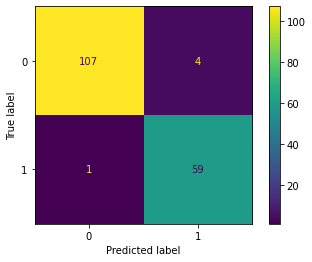

In [112]:
y_pred = model.predict(X_test)

ConfusionM = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=ConfusionM,
                                 display_labels=model.classes_).plot()
plt.show()

## Gaussian naive bayes

[0.96116505 0.99029126 0.93137255 0.97058824 0.97058824]
accuracy : 0.96


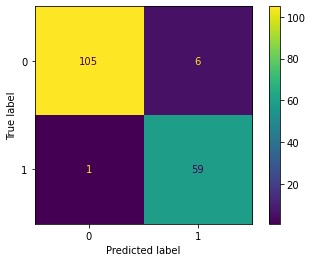

In [113]:
model = GaussianNB()

# cross validation score
scores = cross_val_score(model, X_train, y_train, cv=5)
print(scores)
#accuracy of model
model.fit(X_train, y_train)
print('accuracy : %.2f' %model.score(X_test, y_test))

y_pred = model.predict(X_test)

ConfusionM = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=ConfusionM,
                                 display_labels=model.classes_).plot()
plt.show()

## stratified randomized folds

### The folds are made by preserving the percentage of samples for each class

Fold 0:
accuracy : 0.96


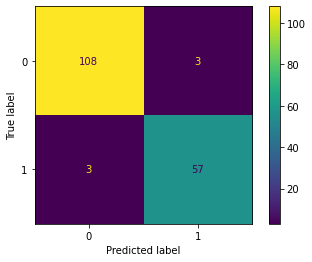

Fold 1:
accuracy : 0.98


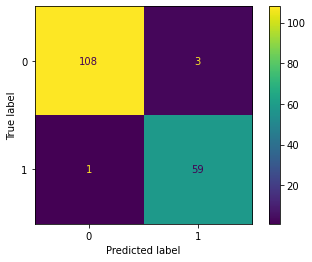

Fold 2:
accuracy : 0.98


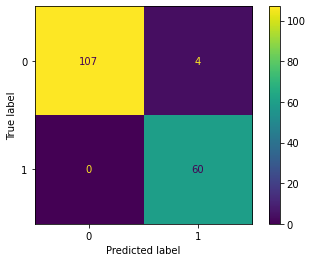

Fold 3:
accuracy : 0.97


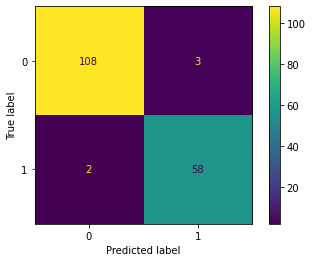

Fold 4:
accuracy : 0.98


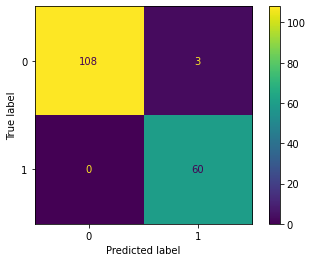

In [115]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=2)
sss.get_n_splits(data, y_data)
for i, (train_index, test_index) in enumerate(sss.split(data, y_data)):
    print(f"Fold {i}:")
    X_train, X_test = data.loc[train_index], data.loc[test_index]
    y_train, y_test = y_data.loc[train_index], y_data.loc[test_index]
    
    model=CategoricalNB()

    model.fit(X_train, y_train)
    print('accuracy : %.2f' %model.score(X_test, y_test))

    y_pred = model.predict(X_test)

    ConfusionM = confusion_matrix(y_test, y_pred)

    ConfusionMatrixDisplay(confusion_matrix=ConfusionM,
                                     display_labels=model.classes_).plot()
    
    plt.show()